# Detecções usando o YOLOv3-tiny pré treinado 

In [88]:
!pip install opencv-python

In [89]:
import matplotlib.pyplot as plt
import cv2

Inicialmente, instalamos a Darknet

In [90]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
/home/jovyan/Q2/darknet
make: Nothing to be done for 'all'.


Baixamos os pesos correspondentes ao YOLOv3-tiny

In [5]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2024-11-04 16:52:53--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  5.65MB/s    in 6.7s    

2024-11-04 16:53:01 (5.06 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



Aplicamos o YOLOv3-tiny para detectar o número de pessoas da imagem. 
Note que os resultados da identificação foram salvos no arquivo output.txt e a imagem com as bound boxes foi salva em prediction.jpg.

In [91]:
! ./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights ../image.png -dont_show -ext_output -save_labels > output.txt

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

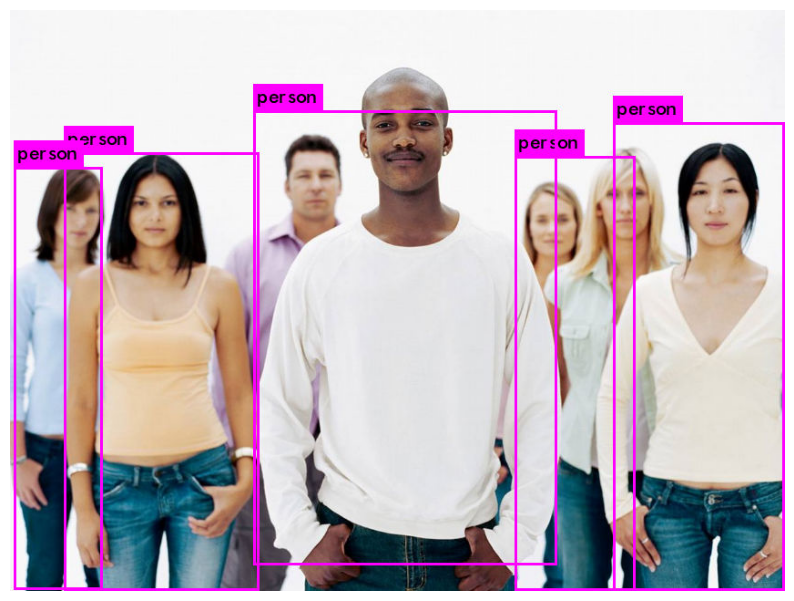

In [92]:
plt.figure(figsize=(10, 8))
img = cv2.imread("predictions.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Perceba que o YOLO teve dificuldade de identificar algumas pessoas, principalmente aquelas cuja apenas a face aparece.
O modelo identificou apenas 5 pessoas ao invés de 7.

Por padrão o YOLOv3-tiny apenas exibe objetos detectados com confiança acima de um determinado threshold. Podemos reduzir esse threshold para ver se o modelo é capaz de detectar mais objetos (pessoas), mesmo com uma confiança menor. Reduziremos o threshold para 0.25.

Note que os resultados da identificação foram salvos no arquivo output.txt e a imagem com as bound boxes foi salva em prediction.jpg

In [93]:
! ./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights ../image.png -dont_show -ext_output -save_labels -thresh 0.25 > output.txt

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

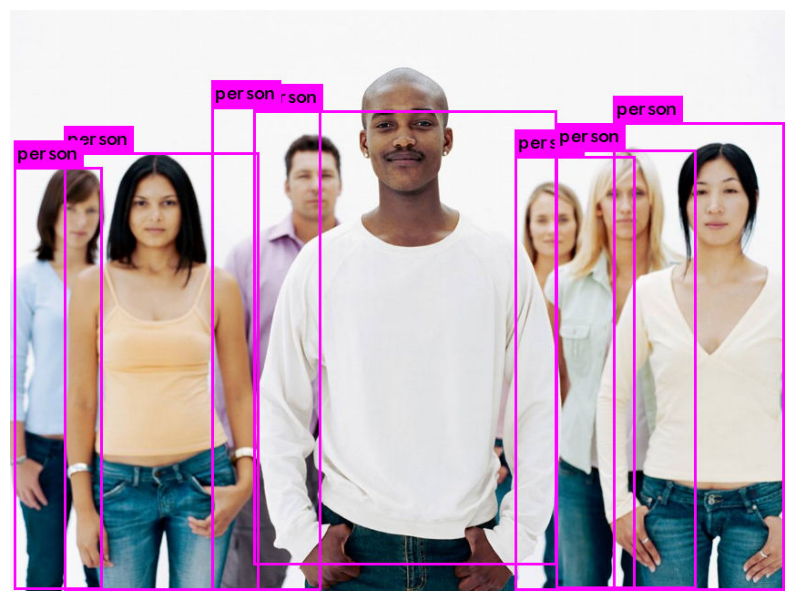

In [94]:
plt.figure(figsize=(10, 8))
img = cv2.imread("predictions.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Veja que o YOLOv3-tiny foi capaz de identificar as 7 pessoas.
Podemos contar automaticamente a quantidade de pessoas verificando o número de objetos 'person' no arquivo output.txt.

In [11]:
# Contando a quantidade de pessoas
with open("output.txt", "r") as file:
    content = file.read()
    count = content.count("person")
    print("Número de pessoas:", count)

Número de pessoas: 7


Esse método, embora funcione, não é o ideal. Ao reduzir o threshold de confiança para a exibição das predições, podemos fazer com que o modelo identifique objetos que não estão presentes na imagem, levando a identificações erradas. Se tivéssemos reduzido o threshold para 0.2 (ao invés de 0.25), teríamos detectado uma gravata que não está de fato na imagem.
Idealmente, o que devemos fazer é treinar o modelo para que ele se torne melhor em detectar pessoas (ou faces!!).

# Fine Tuning do YOLOv3-tiny para a detecção de faces

Aqui usaremos o dataset [Wider Face](http://shuoyang1213.me/WIDERFACE/) para treinar o modelo.

In [12]:
import os
import shutil
import numpy as np
import pandas as pd
import pdb
import yaml


In [ ]:
import os

def print_directory_structure(root_dir):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Use the function by specifying the directory you want to explore
print_directory_structure("./")

## Preprocessamento dos dados

In [13]:
# Definindo pastas de imagens de treino e validação
train_img_folder = "../WIDER_train/images/"
val_img_folder = "../WIDER_val/images/"

# Definindo a pasta e os caminhos dos arquivos de anotações
annotations_folder = f"../wider_face_split/"
train_bbx_path = f"{annotations_folder}wider_face_train_bbx_gt.txt"
val_bbx_path = f"{annotations_folder}wider_face_val_bbx_gt.txt"

Os arquivo que contém os rótulos desta base tem uma estrutura muito específica, que é dada em ordem, por:

    1. Nome do arquivo de imagem correspondente
    2. Número de objetos da imagem
    3. Informações sobre os objetos (bounding boxes, classe, blur, iluminação, ...)
    
Só estamos interessados nas 5 primeiras informações, bounding boxes e classes de cada imagem

In [14]:
# Função para carregar as anotações de bounding boxes

def load_bbx(bbx_path):
    with open(bbx_path, mode='r') as file:
        lines = file.readlines()
        
    annotations = {}
    i = 0
    while i < len(lines):
        file_name = lines[i].strip()  # Nome do arquivo de imagem
        i += 1 # pula para a próxima linha
    
        num_boxes = int(lines[i].strip())  # Número de bounding boxes para a imagem
        i += 1 # pula para a próxima linha
    
        boxes = []
        if num_boxes != 0: #Se existem bounding boxes, coletamos as informações de cada linha  
            for _ in range(num_boxes):
                box_info = lines[i].strip().split()  # Informações da bounding box
                box = {
                    'x': int(box_info[0]),  # Coordenada x
                    'y': int(box_info[1]),  # Coordenada y
                    'w': int(box_info[2]),  # Largura
                    'h': int(box_info[3]),  # Altura
                }
                boxes.append(box)
                i += 1
            annotations[file_name] = boxes  # Adiciona bounding boxes para o arquivo de imagem
        else: # Se não existem bounding boxes, pulamos para a próxima linha
            i += 1

    return annotations

In [15]:
# Carregamos anotações de treino e validação
train_annotations = load_bbx(train_bbx_path)
val_annotations = load_bbx(val_bbx_path)

#Coletamos o nome de cada imagem
train_keys = []
val_keys = []
for key in train_annotations.keys():
    train_keys.append(key)
for key in val_annotations.keys():
    val_keys.append(key)

O YOLOv3-tiny espera que os rótulos estejam definidos no formato x_centro, y_centro, largura e altura. A base de dados utilizada fornece as coordenadas dos pontos extremos da bound box. Precisamos fazer a conversão.

In [16]:
def annotation_to_df(annotation, img_shape):
    cs, xs, ys, ws, hs = [], [], [], [], []
    
    h, w, _ = img_shape
    for box in annotation:
        cs.append(0)
        xs.append((box["x"] + box["w"] / 2.0) / w)
        ys.append((box["y"] + box["h"] / 2.0) / h)
        ws.append(box["w"] / w)
        hs.append(box["h"] / h)
        
    return pd.DataFrame({0:cs, 1:xs, 2:ys, 3:ws, 4:hs})

Aqui, definimos um método para copiar as imagens e os rótulos para um path especificado. 

In [17]:
def add_dataset(keys, annotations, img_folder, root, split):
    # Criamos o diretório root, se ele não existe
    if not os.path.exists(root):
        os.makedirs(root)
    
    # Criamos os diretórios de imagens e labels, se eles não existem
    if not os.path.exists(f"{root}images/{split}"):
        os.makedirs(f"{root}images/{split}")
        os.makedirs(f"{root}labels/{split}")
    
    for i, key in enumerate(keys):
        #Movemos as imagens
        shutil.copy(f"{img_folder}{key}", f"{root}images/{split}/im{i}.jpg")
        #Convertemos e movemos as anotações correspondentes 
        df = annotation_to_df(annotations[key], img.shape)
        df.to_csv(f"{root}labels/{split}/im{i}.txt", header=False, index=False, sep='\t')

In [18]:
add_dataset(train_keys, train_annotations, train_img_folder, "../preprocessed/", "train")

In [19]:
add_dataset(val_keys, val_annotations, val_img_folder, "../preprocessed/", "val")

Vamos criar um arquivo .yaml que vai reunir informações para que possamos treinar o modelo.
Pelo que eu vi, modelos mais antigos, como é o caso do YOLOv3, não utilizam um arquivo .yaml para treinamento. Mas, fiz o teste. Não funcionou :P

In [49]:
# Dicionário para configurar o dataset no arquivo YAML
dict_file = {"path":"./preprocessed",
             "train":"./preprocessed/images/train",
             "val":"./preprocessed/images/val",
             "nc":1,
             "names": ["face"],
             "backup": "./darknet/backup"
            }

with open("./preprocessed/dataset.yaml", 'w') as file:
    documents = yaml.dump(dict_file, file)

Normalmente, para versões mais atigas do YOLO é comum se ter um arquivo .dat e arquivos train.list e val.list para treinar o modelo.
Criamos esses arquivos a seguir.

In [63]:
# Definimos um arquivo .dat
data_content = """classes = 1
train = ./darknet/data/train.list
valid = ./darknet/data/val.list
names = ./darknet/data/obj.names
backup = ./darknet/backup/
"""

# Escrevemos o conteúdo do arquivo .dat
with open('./darknet/data/face.data', 'w') as f:
    f.write(data_content)

In [65]:
# Função para criar arquivos .list (lista de imagens)
def create_list_file(folder_path, list_file_path):
    # listamos todos os arquivos no diretório
    with open(list_file_path, 'w') as f:
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.endswith(('.jpg')):
                    # Adiciona o caminho ao nome dos arquivos de imagem
                    f.write(os.path.join(root, file) + '\n')

# Caminhos das pastas de treino e validação
train_img_folder = "./preprocessed/images/train"
val_img_folder = "./preprocessed/images/val"

# Caminhos para salvar os arquivos .list
train_list_path = "./darknet/data/train.list"
val_list_path = "./darknet/data/val.list"

# Cria os arquivos train.list e val.list
create_list_file(train_img_folder, train_list_path)
create_list_file(val_img_folder, val_list_path)

Criamos também um arquivo .names

In [53]:
# Define o nome da classe para o arquivo obj.names
class_names = ["face"]

# Salva o nome da classe no arquivo obj.names
with open('./darknet/data/obj.names', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

## Treinamento do modelo

Treinamos o modelo com o novo conjunto de dados

In [80]:
!./darknet/darknet detector train ./darknet/data/face.data ./darknet/cfg/yolov3-tiny.cfg ./darknet/yolov3-tiny.weights

yolov3-tiny
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 5

Sendo sincero, não tenho certeza se o modelo de fato treinou e, se treinou, quantas épocas durou o treinamento.
A seguir, tentei fazer a detecção da imagem original (image.png) com os pesos do modelo supostamente treinado, mas não obtive sucesso.

In [76]:
! ./darknet/darknet detect ./darknet/backup//yolov3-tiny_final.weights ./image.png -dont_show -ext_output -save_labels > output.txt

Couldn't open file: cfg/coco.data


In [87]:
!./darknet/darknet detector test  ./darknet/data/face.data ./darknet/cfg/yolov3-tiny.cfg ./darknet/backup//yolov3-tiny_final.weights ./image.png

Cannot load image "data/labels/32_0.png"
STB Reason: can't fopen


Embora não tenhamos obtido sucesso, acreditamos que esse processo foi importante para, pelo menos ilustrar, como poderíamos ter feito para detectar de forma mais confiante e segura as pessoas na imagem.